In [1]:
# Use the edgelist CSV formatted file to build graphs for visualization (Networkx, matplotlib) 
import os
import pandas as pd
import numpy as np
import csv
import seaborn as sns

import networkx as nx

# matplotlib graphs will be included in notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."

# Getting output filename generated by xml_sax_parser 
author_edgelist_file = "./datasets/dblp_author_venue.csv" # BhowmickSouravS.csv Leskovec-Jure.csv

def save_fig(filename, tight_layout=True):
    data_path = os.path.join(PROJECT_ROOT_DIR, "images")    
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    
    fullpath_filename = os.path.join(data_path, filename + ".jpg")
    print("Saving image : ", fullpath_filename)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(fullpath_filename, format='jpg', dpi=300)

In [2]:
# This file contains all edges to be constructed
# Duplicate edges will be represented as only 1 edge forming the group of unique venues (equals to the degree of author)
df = pd.read_csv(author_edgelist_file) 
print("Shape of data frame :", df.shape)
df.head(10)

Shape of data frame : (87640, 2)


,Author,Venue
0,Mathias Bull,PKDD
1,Gnther Kundt,PKDD
2,Lothar Gierl,PKDD
3,Joo Gama,PKDD
4,Pedro Pereira Rodrigues,PKDD
5,Chi Hoon Lee,PKDD
6,Russell Greiner,PKDD
7,Mark W. Schmidt,PKDD
8,Andrzej Dominik,PKDD
9,Zbigniew Walczak,PKDD


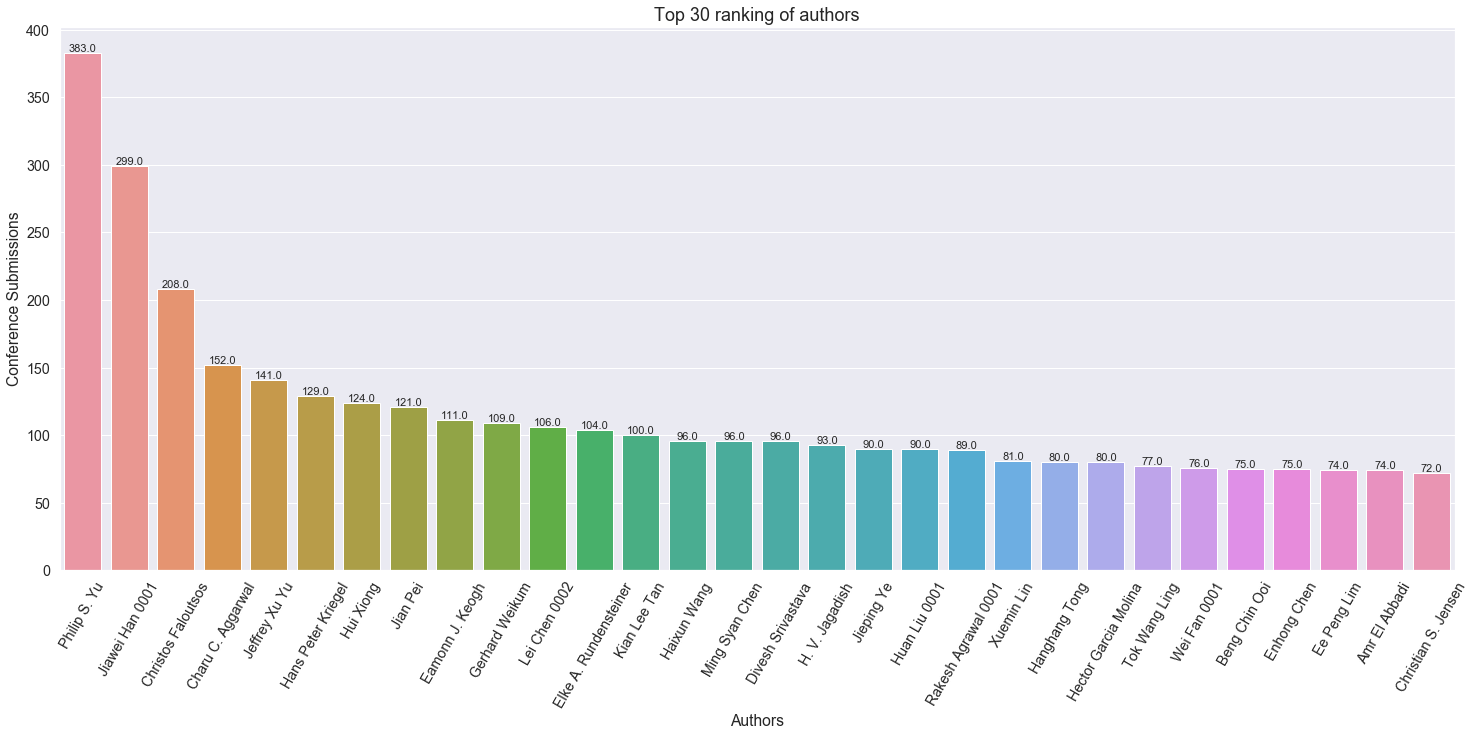

Total no. of authors : 33786
Missing Data for authors : 0.00%
Top 30 :
 Author
Philip S. Yu                      Philip S. Yu
Jiawei Han 0001                Jiawei Han 0001
Christos Faloutsos          Christos Faloutsos
Charu C. Aggarwal            Charu C. Aggarwal
Jeffrey Xu Yu                    Jeffrey Xu Yu
Hans Peter Kriegel          Hans Peter Kriegel
Hui Xiong                            Hui Xiong
Jian Pei                              Jian Pei
Eamonn J. Keogh                Eamonn J. Keogh
Gerhard Weikum                  Gerhard Weikum
Lei Chen 0002                    Lei Chen 0002
Elke A. Rundensteiner    Elke A. Rundensteiner
Kian Lee Tan                      Kian Lee Tan
Divesh Srivastava            Divesh Srivastava
Haixun Wang                        Haixun Wang
Ming Syan Chen                  Ming Syan Chen
H. V. Jagadish                  H. V. Jagadish
Jieping Ye                          Jieping Ye
Huan Liu 0001                    Huan Liu 0001
Rakesh Agrawal 0001        R

In [3]:
# Plotting top rank authors
author_Grp = pd.DataFrame()
author_Grp['authorCount'] = df.groupby(['Author'])['Author'].count()
author_Grp['author'] = author_Grp.index
topmost = 30
total_counts = len(df)
bar_text_filler = 1

# There are too many authors, so we will subset the top authors
author_Grp_top = author_Grp.sort_values(by='authorCount',ascending=False).head(topmost)
order_authors = author_Grp_top.sort_values(by='authorCount',ascending=False)['author']

plt.figure(figsize=(25, 10))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x='author', y='authorCount', data=author_Grp_top, order=order_authors)
ax.set_title('Top ' + str(topmost) + ' ranking of authors', fontsize=18)
for rectBox in ax.patches:
    count = rectBox.get_height()
    #print("Counts :", count)    
    ax.text(rectBox.get_x() + rectBox.get_width()/2.,
            count + bar_text_filler,
            count, # '{:1.2f}%'.format(count/total_counts*100) to get %
            ha="center", fontsize=11)


xt = plt.xticks(rotation=60)
plt.xlabel('Authors')
plt.ylabel('Conference Submissions')
plt.show()

print("Total no. of authors :", len(author_Grp.index))
print("Missing Data for authors : " +
      '{:1.2f}%'.format(df['Author'].isnull().sum() / total_counts * 100))
print("Top " + str(topmost) + " :\n", author_Grp_top['author'])
print("Total number of conference submissions for all authors (include duplicate venues for co-authors) : ", total_counts)

for ctr in range(len(author_Grp_top)):
    if (author_Grp_top.iloc[ctr]['author'] == -999):
        print("Found in Index", str(ctr) + ":", author_Grp_top.iloc[ctr]['authorCount'])
        print("Missing Data : " + '{:1.2f}%'.format(author_Grp_top.iloc[ctr]['authorCount'] / total_counts * 100))


In [4]:
# Get author list for each unique venue
Venue_Authors = pd.DataFrame()
Venue_Authors['author_list'] = df.groupby('Venue')['Author'].unique()

print("CIKM authors are ", Venue_Authors['author_list']['CIKM'])
print("No. of venues : ", Venue_Authors.shape[0])

Venue_Authors['author_list'].head(10)

CIKM authors are  ['Meng Wang 0009' 'Jun Liu 0002' 'Wenqiang Liu' ... 'Arindam Pal 0001'
 'Sreelakshmi Vaddi' 'Md Farhadur Rahman']
No. of venues :  11


Venue
CIKM      [Meng Wang 0009, Jun Liu 0002, Wenqiang Liu, Q...
DASFAA    [Jiakui Zhao, Dongqing Yang, Bin Cui 0001, Lij...
DEXA      [Fernando de Ferreira Rezende, Theo Hrder, Col...
EDBT      [Haibo Hu 0001, Dik Lun Lee, Jianliang Xu, Fed...
ICDE      [Divyakant Agrawal, Amr El Abbadi, Shiyuan Wan...
ICDM      [Zhenyu Chen 0003, Yiqiang Chen, Xingyu Gao, S...
KDD       [Jiaming Shen, Zeqiu Wu, Dongming Lei, Chao Zh...
PAKDD     [Gunnar Rtsch, Bernhard Schlkopf, Alexander J....
PKDD      [Mathias Bull, Gnther Kundt, Lothar Gierl, Joo...
SDM       [Jinze Liu, Susan Paulsen, Xing Sun, Wei Wang ...
Name: author_list, dtype: object

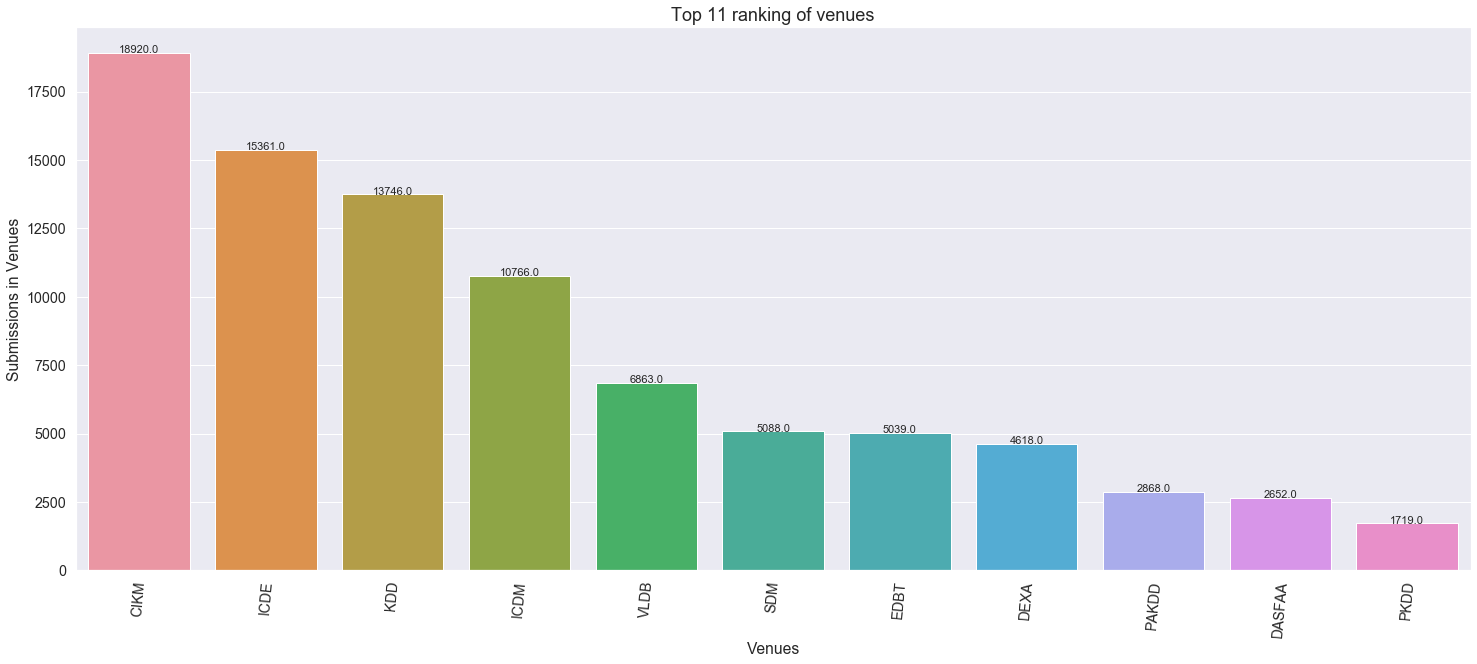

Total no. of venues : 11
Missing Data for venues : 0.00%
Top 11 :
 Venue
CIKM        CIKM
ICDE        ICDE
KDD          KDD
ICDM        ICDM
VLDB        VLDB
SDM          SDM
EDBT        EDBT
DEXA        DEXA
PAKDD      PAKDD
DASFAA    DASFAA
PKDD        PKDD
Name: venue, dtype: object


In [5]:
# Plotting top rank venues
venue_Grp = pd.DataFrame()
venue_Grp['venueCount'] = df.groupby(['Venue'])['Venue'].count()
venue_Grp['venue'] = venue_Grp.index

# Check if ranking is less than topmost
no_Filtered_Venues = Venue_Authors.shape[0]
if no_Filtered_Venues < topmost:
    topmost = no_Filtered_Venues

# There are too many authors, so we will subset the top authors
venue_Grp_top = venue_Grp.sort_values(by='venueCount',ascending=False).head(topmost)
order_venues = venue_Grp_top.sort_values(by='venueCount',ascending=False)['venue']

plt.figure(figsize=(25, 10))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x='venue', y='venueCount', data=venue_Grp_top, order=order_venues)
ax.set_title('Top ' + str(topmost) + ' ranking of venues', fontsize=18)
for rectBox in ax.patches:
    count = rectBox.get_height()
    #print("Counts :", count)    
    ax.text(rectBox.get_x() + rectBox.get_width()/2.,
            count + bar_text_filler,
            count, # '{:1.2f}%'.format(count/total_counts*100) to get %
            ha="center", fontsize=11)


xt = plt.xticks(rotation=85)
plt.xlabel('Venues')
plt.ylabel('Submissions in Venues')
plt.show()

print("Total no. of venues :", len(venue_Grp.index))
print("Missing Data for venues : " +
      '{:1.2f}%'.format(df['Venue'].isnull().sum() / total_counts * 100))
print("Top " + str(topmost) + " :\n", venue_Grp_top['venue'])

for ctr in range(len(venue_Grp_top)):
    if (venue_Grp_top.iloc[ctr]['venue'] == -999):
        print("Found in Index", str(ctr) + ":", venue_Grp_top.iloc[ctr]['venueCount'])
        print("Missing Data : " + '{:1.2f}%'.format(venue_Grp_top.iloc[ctr]['venueCount'] / total_counts * 100))


# (1) Attempt to observe what venues/conferences are submitted by authors and ranked the topmost

In [6]:
by_author = df.groupby('Author')

#for author, frame in by_author:
#    print(frame, end="\n\n") # frame.head(2)

In [7]:
# Sum all the submissions for all authors = No. of edges in venue categories (with duplicate edges) = same as df rows
print("Total no. of submissions for all authors :", sum(by_author.count().values)) # sum of venue counts for all authors

Total no. of submissions for all authors : [87640]


In [8]:
print("The most popular author :", author_Grp_top.iloc[0]['author'])
print("The first author in the author's group :", by_author.first().index[0])
print("The second author in the order of original dataframe :", by_author.head(1)['Author'][1]) # based on original index order

The most popular author : Philip S. Yu
The first author in the author's group : A Min Tjoa
The second author in the order of original dataframe : Gnther Kundt


In [9]:
# No. of submissions for author based on unique venues/conferences whereby the groups should be the same as the degree value
most_popular_author = author_Grp_top.iloc[0]['author'] 
first_author_inGroupby = by_author.first().index[0]
authors = [most_popular_author, first_author_inGroupby]
authors_rank_df = pd.DataFrame()
author_submissions_df = pd.DataFrame()

for author in authors:
    print("\n", author)
    print("-------------------")
    unique_venues, counts = np.unique(by_author.get_group(author)['Venue'], return_counts=True) # Adam Jatowt, Ba Quan Truong
    print("No. of each venue for " + author + " (descending order) :", (sorted(counts, reverse = True)))

    # Value of 248 instead of 251 is because the 4 proceedings" tag with no authors and also an author for "NoBt" which account for no booktitles
    print("Total No. of submission for all unique venues for " + author + " :\n", by_author.get_group(author).count())

    # Initialize all
    first_tuple = second_tuple = third_tuple = fourth_tuple = fifth_tuple = ['', '']
        
    # Attempt to compute "Top 5" positions if they exist
    author_venues_counts = list(zip(unique_venues, counts))

    # Modifies the original list with descending sorting order
    author_venues_counts.sort(key=lambda x: x[1],reverse = True)

    author_unique_venue_count = len(author_venues_counts)
    print("No. of unique submitted venues for " + author + " :", author_unique_venue_count)

    if author_venues_counts[0][0] != 'NoBt':
        if author_unique_venue_count >= 5:
            fifth_tuple = [author, author_venues_counts[4]]
            fourth_tuple = [author, author_venues_counts[3]]
            third_tuple = [author, author_venues_counts[2]]
            second_tuple = [author, author_venues_counts[1]]
            first_tuple = [author, author_venues_counts[0]]
        elif author_unique_venue_count >= 4:
            fourth_tuple = [author, author_venues_counts[3]]
            third_tuple = [author, author_venues_counts[2]]
            second_tuple = [author, author_venues_counts[1]]
            first_tuple = [author, author_venues_counts[0]]
        elif author_unique_venue_count >= 3:
            third_tuple = [author, author_venues_counts[2]]
            second_tuple = [author, author_venues_counts[1]]
            first_tuple = [author, author_venues_counts[0]]
        elif author_unique_venue_count >= 2:
            second_tuple = [author, author_venues_counts[1]]
            first_tuple = [author, author_venues_counts[0]]
        elif author_unique_venue_count >= 1:
            first_tuple = [author, author_venues_counts[0]]        
    else:                
        if author_unique_venue_count >= 5:
            fourth_tuple = [author, author_venues_counts[4]]
            third_tuple = [author, author_venues_counts[3]]
            second_tuple = [author, author_venues_counts[2]]
            first_tuple = [author, author_venues_counts[1]]
        elif author_unique_venue_count >= 4:
            third_tuple = [author, author_venues_counts[3]]
            second_tuple = [author, author_venues_counts[2]]
            first_tuple = [author, author_venues_counts[1]]
        elif author_unique_venue_count >= 3:
            second_tuple = [author, author_venues_counts[2]]
            first_tuple = [author, author_venues_counts[1]]
        elif author_unique_venue_count >= 2:
            first_tuple = [author, author_venues_counts[1]]

    print("The first position venue with total submission counts for " + author + " :", first_tuple)
    print("The second position venue with total submission counts for " + author + " :", second_tuple)
    print("The third position venue with total submission counts for " + author + " :", third_tuple)
    print("The fourth position venue with total submission counts for " + author + " :", fourth_tuple)
    print("The fifth position venue with total submission counts for " + author + " :", fifth_tuple)
    print("Venues and counts of " + author + " :\n", author_venues_counts)

    tmp_ranked_data = [first_tuple, second_tuple, third_tuple, fourth_tuple, fifth_tuple]
    ranked_data = [element for element in tmp_ranked_data if element != ['', '']]  # Strip empty ranking
    
    # Create the topmost ranking venues for each author that have venue grouped
    # ['Author', ('Venue', 'Count')] consider as 2 columns
    tmp_author_rank_df = pd.DataFrame.from_records(ranked_data, columns =['Author', 'Venues with counts'])
    authors_rank_df = authors_rank_df.append(tmp_author_rank_df, ignore_index=True) 
    
    print(authors_rank_df)
    print("--------------------" + author + "--------------------")

    # Create for authors having submissions for each venue respectively
    tmp_author_submissions_df = pd.DataFrame({'Author': author, 'Venue': unique_venues, 'Submissions': counts})
    author_submissions_df = author_submissions_df.append(tmp_author_submissions_df, ignore_index=True) 

print("-------------- Get info from index 4 --------------")
print("Author :", authors_rank_df.iloc[0])
print("at Venue :", authors_rank_df.iloc[0][1])
print("with Count:", authors_rank_df.iloc[0][1][1])
print("---------------------------------------------------")
print("List of authors having submissions for each unique venue respectively (from bottom) :")
author_submissions_df.tail(10)


 Philip S. Yu
-------------------
No. of each venue for Philip S. Yu (descending order) : [74, 70, 67, 64, 62, 21, 14, 5, 4, 2]
Total No. of submission for all unique venues for Philip S. Yu :
 Venue    383
dtype: int64
No. of unique submitted venues for Philip S. Yu : 10
The first position venue with total submission counts for Philip S. Yu : ['Philip S. Yu', ('ICDM', 74)]
The second position venue with total submission counts for Philip S. Yu : ['Philip S. Yu', ('SDM', 70)]
The third position venue with total submission counts for Philip S. Yu : ['Philip S. Yu', ('KDD', 67)]
The fourth position venue with total submission counts for Philip S. Yu : ['Philip S. Yu', ('ICDE', 64)]
The fifth position venue with total submission counts for Philip S. Yu : ['Philip S. Yu', ('CIKM', 62)]
Venues and counts of Philip S. Yu :
 [('ICDM', 74), ('SDM', 70), ('KDD', 67), ('ICDE', 64), ('CIKM', 62), ('VLDB', 21), ('EDBT', 14), ('PKDD', 5), ('PAKDD', 4), ('DASFAA', 2)]
         Author Venues with co

,Author,Venue,Submissions
2,Philip S. Yu,EDBT,14
3,Philip S. Yu,ICDE,64
4,Philip S. Yu,ICDM,74
5,Philip S. Yu,KDD,67
6,Philip S. Yu,PAKDD,4
7,Philip S. Yu,PKDD,5
8,Philip S. Yu,SDM,70
9,Philip S. Yu,VLDB,21
10,A Min Tjoa,DEXA,13
11,A Min Tjoa,ICDE,1


In [10]:
authors = sorted(list(df.Author.unique()))
print("Total no. of unique authors :", len(authors))

authors[:5] # Top 5 in the list

Total no. of unique authors : 33786


['A Min Tjoa', 'A. Ait Hssain', 'A. Alzghoul', 'A. Casanova', 'A. Chiou']

In [11]:
authors_rank_df = pd.DataFrame()
author_submissions_df = pd.DataFrame()
topmost = 5
ranked_data = []
author_ranked_data = []

# for author, frame in by_author (alternative method)
for author in authors:
    unique_venues, counts = np.unique(by_author.get_group(author)['Venue'], return_counts=True) # Adam Jatowt, Ba Quan Truong
    
    num_unique_venues = len(unique_venues)
    #print("No. of unique venues for " + author + " : ", num_unique_venues)
    
    # Re-initialize ranked data list; clear causes complications in retaining the values
    # Caution : Maybe bugs in list clear; take a day to debug
    ranked_data = []

    # Attempt to compute "Top 5" positions
    author_venues_counts = list(zip(unique_venues, counts))

    # Modifies the original list with descending sorting order
    author_venues_counts.sort(key=lambda x: x[1],reverse = True)
    #print("Venues and counts of " + author + " :\n", author_venues_counts)

    # First venue is not 'NoBt'
    if author_venues_counts[0][0] != 'NoBt':
        # Not one less in case the 'NoBt'is in the middle of topmost venues and we can still pick topmost venues 
        if num_unique_venues > topmost:
            # Range runs from 0 to topmost-1 value inclusively; get only the values that is not "NoBt"
            for count in range(topmost):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]
                
                if author_venues_counts[count][0] != 'NoBt':
                    ranked_data.append(rank_tuple)
                #else:
                    #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
                    #print("Venue no. " + str(count + 1) + " in the middle is \"NoBt\"!")

            #print("Top " + str(topmost) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
            #print("--------------------------------------------")

        elif num_unique_venues > 0:
            # Range from 0 to num_unique_venues - 1 for correct indexing; get only the values that is not "NoBt"
            for count in range(num_unique_venues):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]

                if author_venues_counts[count][0] != 'NoBt':
                    ranked_data.append(rank_tuple)
                #else:
                    #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
                    #print("Venue no. " + str(count + 1) + " in the middle is \"NoBt\"!")
                
            #print("Only top " + str(num_unique_venues-1) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
            #print("--------------------------------------------")
        
        # Venues and counts of any author must be at least 1 venue without "NoBt"
        # Thus, do not need to check num_unique_venues <= 0
    else:
        # First venue is 'NoBt'
        if num_unique_venues > topmost:
            # Range runs from 1 to topmost value inclusively; get the next value that is not "NoBt"
            for count in range(1, topmost + 1):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]
                ranked_data.append(rank_tuple)
            
            #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
            #print("Top " + str(topmost) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
        elif num_unique_venues > 1:
            # Range from 1 to num_unique_venues - 1 for correct indexing; get the next value that is not "NoBt"
            for count in range(1, num_unique_venues):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]
                ranked_data.append(rank_tuple)
            
            #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
            #print("Only top " + str(num_unique_venues - 1) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
        #else:
            #print("Venues and counts of " + author + " :\n", author_venues_counts)
            #print("No. of unique venues for " + author + " (must be at least 2 venues including \"NoBt\") : ", num_unique_venues)
            #print("----------------------No ranked data----------------------")

    # Create the topmost ranking venues for each author that have venue grouped
    author_ranked_data.append(ranked_data)
    #print("Author ranked data for " + author + " :\n", author_ranked_data)
    #print("====================================================================================")

    #tmp_author_rank_df = pd.DataFrame.from_records(ranked_data, columns =['Author', 'Venues with counts'])
    #tmp_author_rank_df = pd.DataFrame(data=ranked_data)
    #authors_rank_df = authors_rank_df.append(tmp_author_rank_df, ignore_index=True) 
    
    # Create for authors having submissions for each venue respectively
    tmp_author_submissions_df = pd.DataFrame({'Author': author, 'Venue': unique_venues, 'Submissions': counts})
    
    # Continuous index and need to equate to the original dataframe
    author_submissions_df = author_submissions_df.append(tmp_author_submissions_df, ignore_index=True)

authors_rank_df = pd.DataFrame(author_ranked_data, columns=['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5'], index=authors)
authors_rank_df.head(10)

,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5
A Min Tjoa,"(DEXA, 13)","(ICDE, 1)",None,None,None
A. Ait Hssain,"(DEXA, 1)",None,None,None,None
A. Alzghoul,"(ICDM, 1)",None,None,None,None
A. Casanova,"(DEXA, 1)",None,None,None,None
A. Chiou,"(DASFAA, 1)",None,None,None,None
A. Christensen,"(VLDB, 1)",None,None,None,None
A. D. Smet,"(ICDE, 1)",None,None,None,None
A. Dutkowski,"(EDBT, 1)",None,None,None,None
A. E. Lang,"(ICDE, 1)",None,None,None,None
A. Eiger,"(ICDE, 1)",None,None,None,None


In [12]:
# Display ranked data with author name
authors_rank_df.loc[most_popular_author, :] # ['Sourav S. Bhowmick']

Rank 1    (ICDM, 74)
Rank 2     (SDM, 70)
Rank 3     (KDD, 67)
Rank 4    (ICDE, 64)
Rank 5    (CIKM, 62)
Name: Philip S. Yu, dtype: object

In [13]:
unique_index = pd.Index(list(authors_rank_df.index))
author_index = unique_index.get_loc(most_popular_author)
print("Most popular author's Index :", author_index)

Most popular author's Index : 21891


In [14]:
# Accessing the individual elements
print("Check for None : ", authors_rank_df.iloc[author_index][3] == None)
print("Row 81 :\n", authors_rank_df.iloc[author_index])
print("\nRow 81, column 2 :", authors_rank_df.iloc[author_index][1])
print("Row 81, column 2, item 2 :", authors_rank_df.iloc[author_index][1][1])

Check for None :  False
Row 81 :
 Rank 1    (ICDM, 74)
Rank 2     (SDM, 70)
Rank 3     (KDD, 67)
Rank 4    (ICDE, 64)
Rank 5    (CIKM, 62)
Name: Philip S. Yu, dtype: object

Row 81, column 2 : ('SDM', 70)
Row 81, column 2, item 2 : 70


In [15]:
venues = sorted(list(df.Venue.unique()))
print("Total no. of unique venues (incl. NoBt) :", len(venues))

venues[:20] # Top 20 in the list 

Total no. of unique venues (incl. NoBt) : 11


['CIKM',
 'DASFAA',
 'DEXA',
 'EDBT',
 'ICDE',
 'ICDM',
 'KDD',
 'PAKDD',
 'PKDD',
 'SDM',
 'VLDB']

In [16]:
# Categorise submissions by venue per author same value as the number of edges in graph (ie. 472)
print("Shape of data frame :", author_submissions_df.shape)
author_submissions_df[251:304]

Shape of data frame : (50431, 3)


,Author,Venue,Submissions
251,Abraham Sebastian,ICDE,1
252,Abraham Silberschatz,CIKM,2
253,Abraham Silberschatz,DASFAA,1
254,Abraham Silberschatz,ICDE,7
255,Abraham Silberschatz,KDD,1
256,Abraham Silberschatz,VLDB,21
257,Abram L. Friesen,ICDE,1
258,Acan Gui,CIKM,1
259,Acar Tamersoy,KDD,1
260,Achille Aknin,ICDM,1


In [17]:
# Locating author's index
Author_Venues = pd.DataFrame()

# Non-unique Conferences/Venues
Author_Venues['venue_list'] = df.groupby('Author')['Venue']
print("No. of authors : ", Author_Venues.shape[0])

# Author_Venues['venue_list'][0] gives the first author
author_Venue_List = Author_Venues['venue_list'][author_index] # 'Sourav S. Bhowmick'
authors_Venue_List = Author_Venues['venue_list']

# Gives the list of venues for first author, index 0 is the name of the author
print("List of venues for " + author_Venue_List[0] + " : \n", author_Venue_List[1])

# Participated Conferences/Venues for each author 
unique_values, counts = np.unique(author_Venue_List[1], return_counts=True)
conference_dict = dict(zip(unique_values, counts))

conference_dict

# Print unique venues with total counts
# for idx in range(len(unique_values)):
#     print(str(unique_values[idx]) + " : (" + str(counts[idx]) + ")")
    
print("\nSum of participated conferences :", sum(counts))

# print("\nList of venues for all authors :")
indx = 0
for author in authors_Venue_List:
    author_conference_dict = dict({author[0]: author[1]})
    # Show details for each author with the corresponding venues
    # print(author_conference_dict)
    if author[0] == 'Sourav S. Bhowmick':
        print("********************************")
        print("Found author at location : ", indx)
        print("********************************")

    #print("==========")
    indx += 1

print("Final Index for author :", indx)

No. of authors :  33786
List of venues for Philip S. Yu : 
 145      PKDD
149      PKDD
477      PKDD
634      PKDD
765      PKDD
         ... 
86504    VLDB
86775    VLDB
86907    VLDB
87158    VLDB
87349    VLDB
Name: Venue, Length: 383, dtype: object

Sum of participated conferences : 383
********************************
Found author at location :  26252
********************************
Final Index for author : 33786


## Setup filters only interested venues for plotting "author-venue" graph

In [18]:
# Tier 1 : VLDB, KDD
# Tier 2 : EDBT, ICDE, ICDM, SDM, CIKM
# Tier 3 : DASFAA, PAKDD, PKDD, DEXA
def intersection(list1, list2): 
    return list(set(list1) & set(list2))

# Read desired venues from configuration file (CSV formatted)
tier_venues_df = pd.read_csv('./interested_venues.csv')

tier_venues = tier_venues_df.values.flatten() # ndarray format
tier_venues

array(['VLDB', 'KDD', 'EDBT', 'ICDE', 'ICDM', 'SDM', 'CIKM', 'DASFAA',
       'PAKDD', 'PKDD', 'DEXA'], dtype=object)

In [19]:
topmost_authors_venues_df = pd.DataFrame()

# author_Grp_top with columns [authorCount, author] and index "Author"
# author_Grp_top.index are same values as author_Grp_top['author']
print("No. of topmost authors : ", len(author_Grp_top.index))
authors_venues_sub_df = author_submissions_df.set_index('Author')

for author in author_Grp_top.index:
    #print(author)
    selected_author_df = authors_venues_sub_df.loc[author, : ]
    topmost_authors_venues_df = topmost_authors_venues_df.append(selected_author_df)

# Change index from "Author" to an index of running numbers
topmost_authors_venues_df.reset_index(inplace=True)

print("The shape of topmost authors with venues and respective submissions : ", topmost_authors_venues_df.shape)
topmost_authors_venues_df.head(20)

No. of topmost authors :  30
The shape of topmost authors with venues and respective submissions :  (239, 3)


,Author,Venue,Submissions
0,Philip S. Yu,CIKM,62
1,Philip S. Yu,DASFAA,2
2,Philip S. Yu,EDBT,14
3,Philip S. Yu,ICDE,64
4,Philip S. Yu,ICDM,74
5,Philip S. Yu,KDD,67
6,Philip S. Yu,PAKDD,4
7,Philip S. Yu,PKDD,5
8,Philip S. Yu,SDM,70
9,Philip S. Yu,VLDB,21


In [20]:
import operator

# 1. Create the graph
# For drawing all edges from CSV file
# g = nx.from_pandas_edgelist(df, source='Author', target='Venue', create_using=Graphtype)

# Plot only for the Topmost authors
Graphtype = nx.Graph()
g = nx.from_pandas_edgelist(topmost_authors_venues_df, source='Author', target='Venue', #edge_attr = 'Submissions', 
                            create_using=Graphtype)

# eigenvector centrality is a dictionary
eigenvector_centrality = nx.eigenvector_centrality(g)
print(['%s has %0.3f'%(node, eigenvector_centrality[node]) for node in eigenvector_centrality])

degree_dict_values = eigenvector_centrality.values()
degree_dict_keys = eigenvector_centrality.keys()

max_dict_value = max(degree_dict_values)
max_dict_key = max(eigenvector_centrality, key=lambda k: eigenvector_centrality[k])

#print("Degree Dictionary : ", eigenvector_centrality)
print("\nMax. degree : %0.3f" %max_dict_value)
print("Most popular venue (Max. degree key) : ", max_dict_key)
print("Degree for venue, 'ICDE' : %0.2f" %eigenvector_centrality['ICDE'])

sorted(eigenvector_centrality)

sorted_eigenvector_centrality = dict(sorted(eigenvector_centrality.items(), key=operator.itemgetter(1),reverse=True))
print('\nEigenvector centrality in descending order by value :\n', sorted_eigenvector_centrality)

['Philip S. Yu has 0.155', 'CIKM has 0.274', 'DASFAA has 0.191', 'EDBT has 0.229', 'ICDE has 0.258', 'ICDM has 0.235', 'KDD has 0.266', 'PAKDD has 0.160', 'PKDD has 0.125', 'SDM has 0.183', 'VLDB has 0.245', 'Jiawei Han 0001 has 0.162', 'DEXA has 0.094', 'Christos Faloutsos has 0.142', 'Charu C. Aggarwal has 0.142', 'Jeffrey Xu Yu has 0.153', 'Hans Peter Kriegel has 0.162', 'Hui Xiong has 0.101', 'Jian Pei has 0.155', 'Eamonn J. Keogh has 0.142', 'Gerhard Weikum has 0.144', 'Lei Chen 0002 has 0.122', 'Elke A. Rundensteiner has 0.125', 'Kian Lee Tan has 0.129', 'Divesh Srivastava has 0.122', 'Haixun Wang has 0.155', 'Ming Syan Chen has 0.146', 'H. V. Jagadish has 0.103', 'Jieping Ye has 0.087', 'Huan Liu 0001 has 0.111', 'Rakesh Agrawal 0001 has 0.117', 'Xuemin Lin has 0.133', 'Hanghang Tong has 0.105', 'Hector Garcia Molina has 0.091', 'Tok Wang Ling has 0.112', 'Wei Fan 0001 has 0.142', 'Beng Chin Ooi has 0.129', 'Enhong Chen has 0.087', 'Ee Peng Lim has 0.128', 'Amr El Abbadi has 0.1

Popular venues : ['CIKM', 'DASFAA', 'DEXA', 'EDBT', 'ICDE', 'ICDM', 'KDD', 'PAKDD', 'PKDD', 'SDM', 'VLDB']
Sorted Tier venues : ['CIKM', 'DASFAA', 'DEXA', 'EDBT', 'ICDE', 'ICDM', 'KDD', 'PAKDD', 'PKDD', 'SDM', 'VLDB']
Intersected venues : ['CIKM', 'DASFAA', 'DEXA', 'EDBT', 'ICDE', 'ICDM', 'KDD', 'PAKDD', 'PKDD', 'SDM', 'VLDB']
Interested venues not present : set()


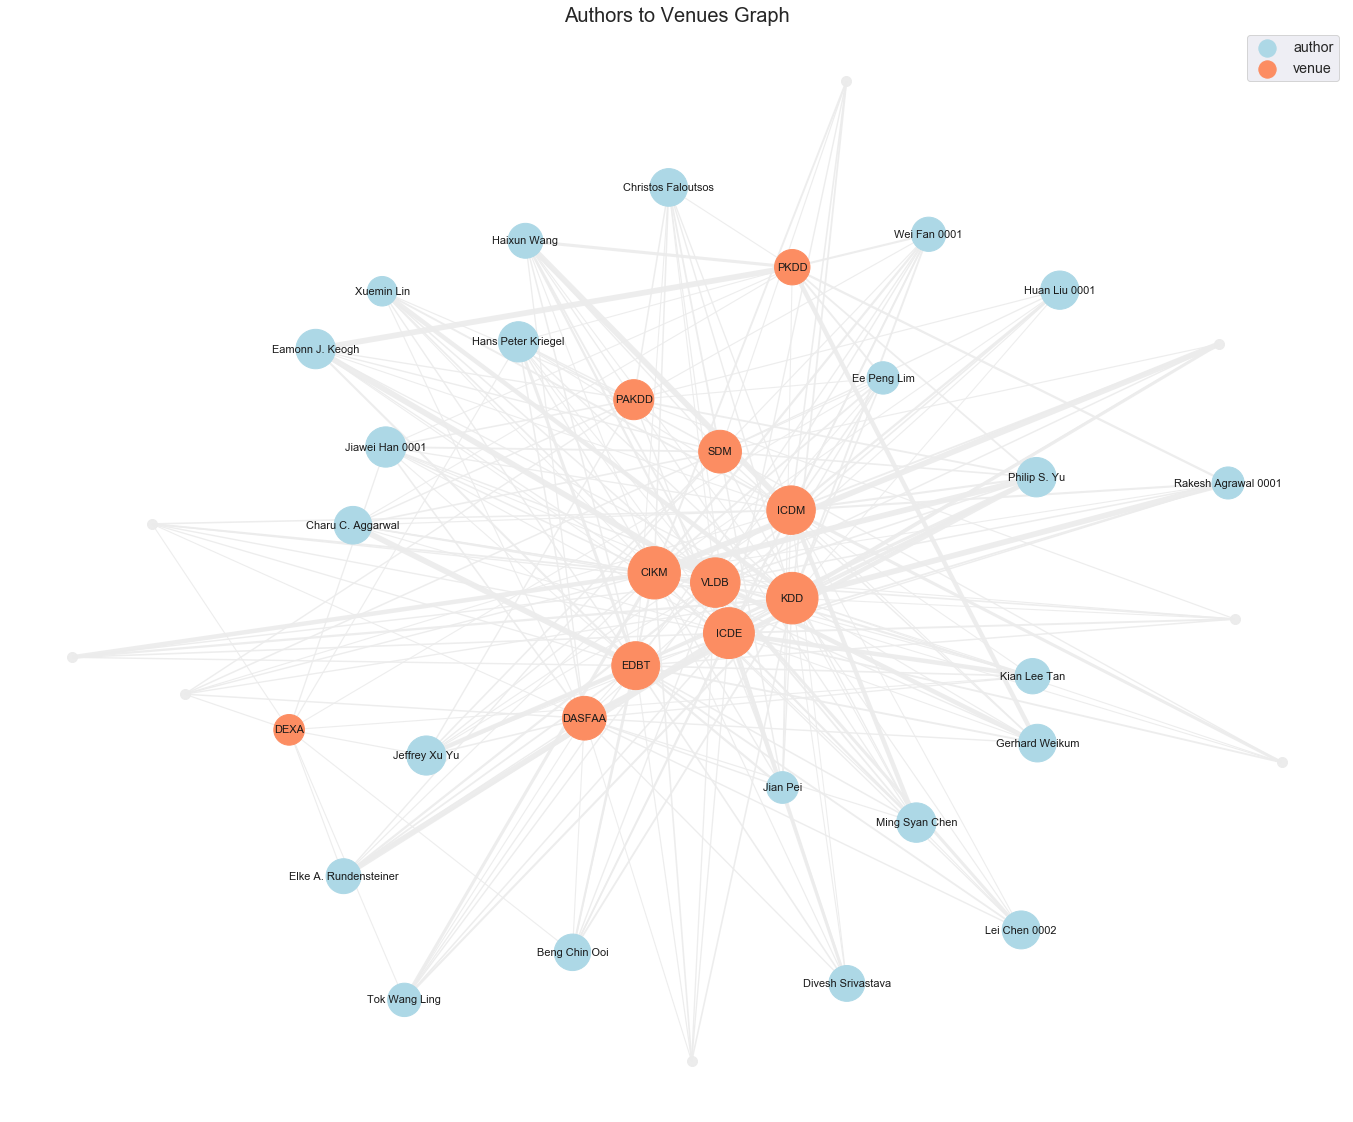

In [21]:
author_eigenvc_cutoff = 0.11
venue_eigenvc_cutoff = 0
small_node_size = 100
legend_circle_size = 300
node_multiplier = 10000
weight_multiplier = 0.015

# 2. Create a layout for our nodes
# layout = nx.spring_layout(g)
layout = nx.spring_layout(g,iterations=50)

plt.figure(figsize=(24, 20))

# 3. Draw the relevant graph with nodes and links
# Author is small and grey

# Labels for authors ONLY
# Authors who are highly connected are a highlighted color

# Create a list of popular authors
# For illustrations : Plot only for topmost authors and use 7 for unfiltered venues and use g.degree(author) for unweighted graph
popular_authors = [author for author in author_Grp_top.index if eigenvector_centrality[author] > author_eigenvc_cutoff] # authors 

# Create a list of popular venues and use g.degree(venue) for unweighted graph
popular_venues = [venue for venue in venues if eigenvector_centrality[venue] > venue_eigenvc_cutoff] # 0 for small networks
print("Popular venues :", popular_venues)
sorted_tier_venues = sorted(tier_venues)
print("Sorted Tier venues :", sorted_tier_venues)

displayed_venues = sorted(intersection(tier_venues, popular_venues))
print("Intersected venues :", displayed_venues)
venues_difference = set(tier_venues).symmetric_difference(displayed_venues)
print("Interested venues not present :", venues_difference)

# Create nodes for popular authors mainly for legend labelling
nx.draw_networkx_nodes(g, layout, nodelist=popular_authors, node_color='lightblue',
                       node_size=legend_circle_size, label='author') # lightblue

# List of popular venue nodes are determined from the popular_venues list and displayed nodes in orange
nx.draw_networkx_nodes(g, layout, nodelist=popular_venues, node_color='#fc8d62',
                       node_size=legend_circle_size, label='venue') # orange

# Obtain degree of authors and multiply by constant to get the circle size
# The respective size is proportional to the number of connections, g.degree(author) for unweighted graph
# For illustrations : Plot only for topmost authors based on eigenvector centrality
author_size = [eigenvector_centrality[author] * node_multiplier for author in author_Grp_top.index] # instead of authors

# List of author nodes are determined from the topmost author list and displayed nodes in lightgrey with smaller fixed size
nx.draw_networkx_nodes(g, layout, nodelist=author_Grp_top.index, # authors
                       node_size=small_node_size, node_color='#ebebebeb')

# Superimpose nodes with new size and color
nx.draw_networkx_nodes(g, layout, nodelist=popular_authors, # for popular authors
                       node_size=author_size,               # a list of sizes, based on eigenvector centrality
                       node_color='lightblue')

# Use g.degree(venue) for unweighted graph
venue_size = [eigenvector_centrality[venue] * node_multiplier for venue in venues]

# List of Venue nodes are determined from the venues list and displayed nodes in grey
nx.draw_networkx_nodes(g, layout, nodelist=venues,
                       node_size=venue_size,               # a list of sizes, based on eigenvector centrality
                       node_color='#fc8d62')               # #AAAAAA or #cccccc

# Links/Edges are thin and displayed in lightgrey
weights = author_Grp_top['authorCount'] * weight_multiplier # Multiply to adjust the edge thickness
nx.draw_networkx_edges(g, layout, width=weights, edge_color="#ecececec") # width based on 'Submissions'

# Label the Venues
venue_labels = dict(zip(venues, venues))
displayed_venues_labels = dict(zip(displayed_venues, displayed_venues))

# Label the authors
# authors_labels = dict(zip(authors, authors)) # labels for all authors
popular_authors_labels = dict(zip(popular_authors, popular_authors))

nx.draw_networkx_labels(g, layout, labels=popular_authors_labels, font_size=11) # author_labels
nx.draw_networkx_labels(g, layout, labels=displayed_venues_labels, font_size=11) # venue_labels
# font_family="sans-serif"

# 4. Turn off the axis
plt.axis('off')
#nx.draw_networkx(g, layout)

plt.legend(loc='best')

plt.title("Authors to Venues Graph", fontsize=20)
#save_fig("dblp_author_venue_graph")

# To remove node label coordinates and have matplotlib to show display
plt.show()

## The prestige of authors/venues can be measured by Eigenvector centrality

In [22]:
len(g.nodes) # For the entire author-venue graph, Total no. of authors (33786) and conferences (11)

41

In [23]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 41
Number of edges: 239
Average degree:  11.6585


## Property 1 : Small-world phenomenon

In [24]:
N = nx.number_of_nodes(g)
L = nx.number_of_edges(g)
dMax = nx.distance_measures.diameter(g)
k = (2 * L) / N

# work automatically for directed/undirected graph, should have to multiply by 2 for undirected graph
d = nx.average_shortest_path_length(g)

print("Diameter of graph : ", dMax)
print("Average degree of graph, <k> : ", float("{0:.4f}".format(k)))

print("Is this a directed graph : ", g.is_directed())
print("Average distance of graph : ", float("{0:.4f}".format(d)))

d_rand = np.log(N) / np.log(k)
print("Random network distance estimate, ln N/ln <k> : ", float("{0:.4f}".format(d_rand)))

Diameter of graph :  3
Average degree of graph, <k> :  11.6585
Is this a directed graph :  False
Average distance of graph :  1.8195
Random network distance estimate, ln N/ln <k> :  1.512


In [25]:
degree_dict = (dict(g.degree))
degree_dict_values = degree_dict.values()
degree_dict_keys = degree_dict.keys()

max_dict_value = max(degree_dict_values)
max_dict_key = max(degree_dict, key=lambda k: degree_dict[k])

print("Degree Dictionary : ", degree_dict)
print("Max. degree : ", max_dict_value)
print("Most popular venue (Max. degree key) : ", max_dict_key)
print("Degree for venue, 'ICDE' :", degree_dict['ICDE'])

# Values for degrees are categories for unique conferences or authors; there might be multiple duplicates links/edges
# They are different from the unique values for book titles and respective counts in the total submissions/participations

Degree Dictionary :  {'Philip S. Yu': 10, 'CIKM': 30, 'DASFAA': 20, 'EDBT': 24, 'ICDE': 28, 'ICDM': 25, 'KDD': 29, 'PAKDD': 16, 'PKDD': 12, 'SDM': 19, 'VLDB': 26, 'Jiawei Han 0001': 11, 'DEXA': 10, 'Christos Faloutsos': 9, 'Charu C. Aggarwal': 9, 'Jeffrey Xu Yu': 10, 'Hans Peter Kriegel': 11, 'Hui Xiong': 7, 'Jian Pei': 10, 'Eamonn J. Keogh': 9, 'Gerhard Weikum': 9, 'Lei Chen 0002': 7, 'Elke A. Rundensteiner': 8, 'Kian Lee Tan': 8, 'Divesh Srivastava': 7, 'Haixun Wang': 10, 'Ming Syan Chen': 9, 'H. V. Jagadish': 6, 'Jieping Ye': 5, 'Huan Liu 0001': 7, 'Rakesh Agrawal 0001': 7, 'Xuemin Lin': 8, 'Hanghang Tong': 6, 'Hector Garcia Molina': 5, 'Tok Wang Ling': 7, 'Wei Fan 0001': 9, 'Beng Chin Ooi': 8, 'Enhong Chen': 5, 'Ee Peng Lim': 9, 'Amr El Abbadi': 7, 'Christian S. Jensen': 6}
Max. degree :  30
Most popular venue (Max. degree key) :  CIKM
Degree for venue, 'ICDE' : 28


In [26]:
degree_list = list((g.degree))
sorted(degree_list, reverse=True)[:50] # Descending according to author (index) and display 50

[('Xuemin Lin', 8),
 ('Wei Fan 0001', 9),
 ('VLDB', 26),
 ('Tok Wang Ling', 7),
 ('SDM', 19),
 ('Rakesh Agrawal 0001', 7),
 ('Philip S. Yu', 10),
 ('PKDD', 12),
 ('PAKDD', 16),
 ('Ming Syan Chen', 9),
 ('Lei Chen 0002', 7),
 ('Kian Lee Tan', 8),
 ('KDD', 29),
 ('Jieping Ye', 5),
 ('Jiawei Han 0001', 11),
 ('Jian Pei', 10),
 ('Jeffrey Xu Yu', 10),
 ('ICDM', 25),
 ('ICDE', 28),
 ('Hui Xiong', 7),
 ('Huan Liu 0001', 7),
 ('Hector Garcia Molina', 5),
 ('Hans Peter Kriegel', 11),
 ('Hanghang Tong', 6),
 ('Haixun Wang', 10),
 ('H. V. Jagadish', 6),
 ('Gerhard Weikum', 9),
 ('Enhong Chen', 5),
 ('Elke A. Rundensteiner', 8),
 ('Ee Peng Lim', 9),
 ('Eamonn J. Keogh', 9),
 ('EDBT', 24),
 ('Divesh Srivastava', 7),
 ('DEXA', 10),
 ('DASFAA', 20),
 ('Christos Faloutsos', 9),
 ('Christian S. Jensen', 6),
 ('Charu C. Aggarwal', 9),
 ('CIKM', 30),
 ('Beng Chin Ooi', 8),
 ('Amr El Abbadi', 7)]

In [27]:
# Total : Topmost authors (30) + filtered venues (11)
len(degree_list)

41

In [28]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
dmax = max(degree_sequence)

print("Sorted degree sequence :", degree_sequence)
print("Max. degree :", dmax)

Sorted degree sequence : [30, 29, 28, 26, 25, 24, 20, 19, 16, 12, 11, 11, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5]
Max. degree : 30


In [29]:
degree_histogram = nx.degree_histogram(g)
print("Degree of the most popular author :", g.degree(most_popular_author)) # 'Sourav S. Bhowmick'
print("No. of degree components (from 0 which is unconnected) :", len(degree_histogram))
print("Total no. of unique authors and conferences :", sum(degree_histogram))

Degree of the most popular author : 10
No. of degree components (from 0 which is unconnected) : 31
Total no. of unique authors and conferences : 41


In [30]:
print("List of index and values :")

for index, value in zip(range(len(degree_histogram)), degree_histogram):
    print(index, value, end='; ')

List of index and values :
0 0; 1 0; 2 0; 3 0; 4 0; 5 3; 6 3; 7 7; 8 4; 9 7; 10 5; 11 2; 12 1; 13 0; 14 0; 15 0; 16 1; 17 0; 18 0; 19 1; 20 1; 21 0; 22 0; 23 0; 24 1; 25 1; 26 1; 27 0; 28 1; 29 1; 30 1; 

## Property 2 : Scale-free

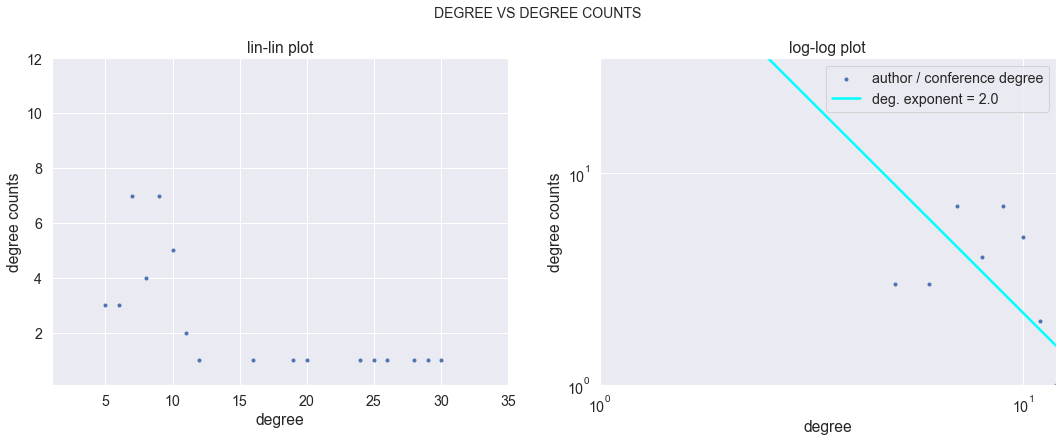

In [31]:
# The degrees here are for both the topmost author (30) and interested conferences (11) 
degree_counts = degree_histogram
degree = list(range(len(degree_histogram)))

coeff = 220
power = -2.0
x = np.linspace(1, 100, num=10)
y = coeff * x**power
legend_labels = ['author / conference degree', 'deg. exponent = ' + str(-1*power)]
filler_space = 5

# Plotting graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Degree vs Degree Counts'.upper(), y=1.0, fontsize=14)

# Plot lin-lin graph on the left column
plt.subplot(1, 2, 1)

plt.xlabel(r'degree')
plt.xlim(1, max(degree) + filler_space)
plt.ylabel(r'degree counts')
plt.ylim(0.1, max(degree_counts) + filler_space)

#plt.legend(loc='best') # 'upper left'
plt.scatter(degree, degree_counts, marker='.')
plt.title(r'lin-lin plot')
plt.grid(True)

# Plot log-log graph on the right column
plt.subplot(1, 2, 2)
plt.xlabel('degree')
plt.xscale('log')
plt.xlim(1, max(degree_counts) + filler_space)
plt.ylabel('degree counts')
plt.yscale('log')
plt.ylim(1, max(degree) + filler_space)

plt.scatter(degree, degree_counts, marker='.', label=legend_labels[0])
plt.title('log-log plot')

# '$f(x) = '+str(power)+'\cdot x + \log('+ str(coeff) + ')$'
plt.plot(x, y, linewidth=2.5, color='cyan', label=legend_labels[1])
plt.legend(loc='best')

# Change the order displayed in the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.show()

## The plot above show that degree counts for authors tend to follow power-law

In [32]:
N = len(g.nodes)
prob_k = []
for k in degree_histogram:
    prob_k.append(k/N)
    
print(prob_k)

max(prob_k)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.07317073170731707, 0.07317073170731707, 0.17073170731707318, 0.0975609756097561, 0.17073170731707318, 0.12195121951219512, 0.04878048780487805, 0.024390243902439025, 0.0, 0.0, 0.0, 0.024390243902439025, 0.0, 0.0, 0.024390243902439025, 0.024390243902439025, 0.0, 0.0, 0.0, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.0, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025]


0.17073170731707318

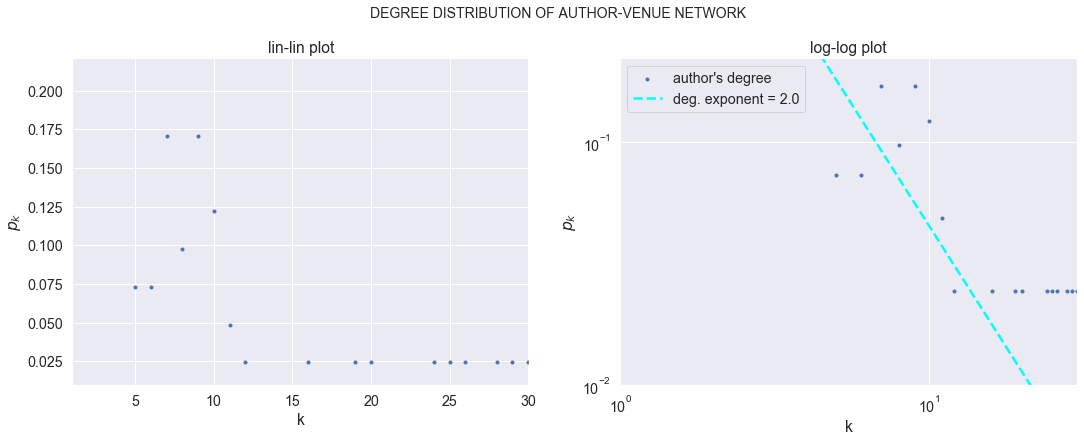

In [33]:
degree_counts = degree_histogram
degree = list(range(len(degree_histogram)))

coeff = 4.5
power = -2.0
x = np.linspace(1, max(degree), num=10)
y = coeff * x**power
legend_labels = ['author\'s degree', 'deg. exponent = ' + str(-1*power)]
filler_space = 0.05

# Plotting graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Degree Distribution of author-venue network'.upper(), y=1.0, fontsize=14)

# Plot lin-lin graph on the left column
plt.subplot(1, 2, 1)

plt.xlabel(r'k')
plt.xlim(1, max(degree) + filler_space)
plt.ylabel(r'$p_k$')
plt.ylim(0.01, max(prob_k) + filler_space)

#plt.legend(loc='best') # 'upper left'
plt.scatter(degree, prob_k, marker='.')
plt.title(r'lin-lin plot')
plt.grid(True)

# Plot log-log graph on the right column
plt.subplot(1, 2, 2)
plt.xlabel('k')
plt.xscale('log')
plt.xlim(1, max(degree) + filler_space)
plt.ylabel(r'$p_k$')
plt.yscale('log')
plt.ylim(0.01, max(prob_k) + filler_space)

plt.scatter(degree, prob_k, marker='.', label=legend_labels[0])
plt.title('log-log plot')

# '$f(x) = '+str(power)+'\cdot x + \log('+ str(coeff) + ')$'
plt.plot(x, y, '--', linewidth=2.5, color='cyan', label=legend_labels[1])
plt.legend(loc='best')

# Change the order displayed in the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.show()

## The plot above show that probability distributions for "author-conference" network tend to follow power-law as well

# Miscellaneous testings

In [34]:
find_Venue = 'VLDB'
title = 'A'
year = 2020

if title and year and (find_Venue in tier_venues):
    print("Found : " + title + " in " + str(year) +  " at " + find_Venue)
else:
    print("Not found :", find_Venue)

Found : A in 2020 at VLDB


In [35]:
from collections import Counter
degree_dict = Counter(degree_dict)

degree_dict.most_common()

[('CIKM', 30),
 ('KDD', 29),
 ('ICDE', 28),
 ('VLDB', 26),
 ('ICDM', 25),
 ('EDBT', 24),
 ('DASFAA', 20),
 ('SDM', 19),
 ('PAKDD', 16),
 ('PKDD', 12),
 ('Jiawei Han 0001', 11),
 ('Hans Peter Kriegel', 11),
 ('Philip S. Yu', 10),
 ('DEXA', 10),
 ('Jeffrey Xu Yu', 10),
 ('Jian Pei', 10),
 ('Haixun Wang', 10),
 ('Christos Faloutsos', 9),
 ('Charu C. Aggarwal', 9),
 ('Eamonn J. Keogh', 9),
 ('Gerhard Weikum', 9),
 ('Ming Syan Chen', 9),
 ('Wei Fan 0001', 9),
 ('Ee Peng Lim', 9),
 ('Elke A. Rundensteiner', 8),
 ('Kian Lee Tan', 8),
 ('Xuemin Lin', 8),
 ('Beng Chin Ooi', 8),
 ('Hui Xiong', 7),
 ('Lei Chen 0002', 7),
 ('Divesh Srivastava', 7),
 ('Huan Liu 0001', 7),
 ('Rakesh Agrawal 0001', 7),
 ('Tok Wang Ling', 7),
 ('Amr El Abbadi', 7),
 ('H. V. Jagadish', 6),
 ('Hanghang Tong', 6),
 ('Christian S. Jensen', 6),
 ('Jieping Ye', 5),
 ('Hector Garcia Molina', 5),
 ('Enhong Chen', 5)]

In [36]:
# Verify total number of publications for author from python script
#publications_list = [1, 3, 1, 1, 7, 1, 1, 18, 1, 1, 12, 7, 5, 18, 1, 3, 1, 4, 3, 2,
#                     4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 16, 1, 2, 1, 1, 1, 1, 3, 1, 2,
#                     2, 1, 1, 4, 1, 1, 6, 16, 1, 1, 1, 1, 1, 2, 3]

publications_list = [1, 3, 1, 1, 7, 1, 1, 18, 1, 1, 12, 7, 5, 18, 1, 3, 1, 4, 3, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1,
                     1, 16, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 75, 1, 4, 1, 1, 6, 16, 1, 1, 1, 1, 1, 2, 3]
sum(publications_list), len(publications_list)

(251, 56)

In [37]:
py_etree = ['CIKM', 'CIKM', 'DASFAA (1)', 'GRADES/NDA@SIGMOD/PODS', 'ICDE', 'ICDE', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'SIGMOD Conference',
            'WSDM', 'Encyclopedia of Big Data Technologies', 'Human Interaction with Graphs', 'CIKM', 'ICDE', 'SIGIR', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'BCB',
            'CIKM', 'FQAS', 'ICDE', 'SIGIR', 'SIGIR', 'SIGMOD Conference', 'BCB', 'BCB', 'ICDE', 'ICDM Workshops',
            'ICDM Workshops', 'SIGMOD Conference', 'SIGMOD Conference', 'ACL (1)', 'CIKM', 'ICDE', 'ICDE', 'ICDE', 'ICDE', 'SIGMOD Conference',
            'BCB', 'BigComp', 'DEXA (1)', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'WWW (Companion Volume)', 'WWW (Companion Volume)', 'DASFAA (1)', 'DASFAA (2)',
            'CIDR', 'DASFAA (2)', 'EDBT', 'ACM Multimedia', 'SIGMOD Conference', 'SIGMOD Conference', 'BCB', 'CIKM', 'DASFAA (1)', 'DASFAA (1)',
            'DASFAA (2)', 'EDBT', 'ICDE', 'ICDE', 'IHI', 'IHI', 'IHI', 'ICMR', 'WWW (Companion Volume)', 'BCB',
            'BCB', 'CIKM', 'DASFAA (2)', 'DASFAA (1)', 'DASFAA (1)', 'ICDE', 'ACM Multimedia', 'SIGMOD Conference', 'Social Media Modeling and Computing', 'CIKM',
            'DASFAA (1)', 'DASFAA (2)', 'ICDE', 'ACM Multimedia', 'Pacific Symposium on Biocomputing', 'SIGMOD Conference', 'CIKM', 'CIKM', 'DASFAA', 'DASFAA',
            'ICDE', 'WSM@MM', 'DEXA', 'APWeb', 'CIKM', 'OTM Conferences (1)', 'DEXA', 'CIKM', 'DASFAA', 'DASFAA',
            'DASFAA', 'DEXA', 'SIGMOD Conference', 'WWW', 'DASFAA', 'DASFAA', 'DEXA', 'ER', 'ICDE Workshops', 'ICDE',
            'KDD', 'PAKDD', 'PAKDD', 'PAKDD', 'WWW', 'Foundations and Novel Approaches in Data Mining', 'CIKM', 'CIKM', 'CIKM', 'DASFAA',
            'DASFAA', 'DASFAA', 'DEXA', 'DEXA', 'DEXA', 'DEXA', 'CIKM', 'CIKM', 'CoopIS/DOA/ODBASE (2)', 'DASFAA',
            'DaWaK', 'DaWaK', 'DEXA', 'DEXA', 'DEXA', 'ER', 'MMDB', 'MMDB', 'PAKDD', 'PKDD',
            'CIKM', 'DEXA', 'DEXA', 'DEXA Workshops', 'EC-Web', 'ER (Workshops)', 'ER', 'ICDE', 'Mobile Data Management', 'CoopIS/DOA/ODBASE',
            'DaWaK', 'DEXA', 'DEXA', 'DEXA Workshops', 'DEXA Workshops', 'EC-Web', 'EC-Web', 'VLDB', 'WISE Workshops', 'DEXA',
            'DEXA', 'DOLAP', 'ICDCS', 'ICPADS', 'Kyoto International Conference on Digital Libraries', 'Kyoto International Conference on Digital Libraries', 'DASFAA', 'DaWaK', 'ICSC', 'IDEAS',
            'ADL', 'DEXA', 'ER Workshops', 'ER', 'ER Workshops', 'FODO']

py_sax = ['CIKM', 'CIKM', 'DASFAA (1)', 'GRADES/NDA@SIGMOD/PODS', 'ICDE', 'ICDE', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'SIGMOD Conference',
          'WSDM', 'CIKM', 'ICDE', 'SIGIR', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'BCB', 'CIKM', 'FQAS',
          'ICDE', 'SIGIR', 'SIGIR', 'SIGMOD Conference', 'BCB', 'BCB', 'ICDE', 'ICDM Workshops', 'ICDM Workshops', 'SIGMOD Conference',
          'SIGMOD Conference', 'ACL (1)', 'CIKM', 'ICDE', 'ICDE', 'ICDE', 'ICDE', 'SIGMOD Conference', 'BCB', 'BigComp',
          'DEXA (1)', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'WWW (Companion Volume)', 'WWW (Companion Volume)', 'DASFAA (1)', 'DASFAA (2)', 'CIDR', 'DASFAA (2)',
          'EDBT', 'ACM Multimedia', 'SIGMOD Conference', 'SIGMOD Conference', 'BCB', 'CIKM', 'DASFAA (1)', 'DASFAA (1)', 'DASFAA (2)', 'EDBT',
          'ICDE', 'ICDE', 'IHI', 'IHI', 'IHI', 'ICMR', 'WWW (Companion Volume)', 'BCB', 'BCB', 'CIKM', 
          'DASFAA (2)', 'DASFAA (1)', 'DASFAA (1)', 'ICDE', 'ACM Multimedia', 'SIGMOD Conference', 'CIKM', 'DASFAA (1)', 'DASFAA (2)', 'ICDE',
          'ACM Multimedia', 'Pacific Symposium on Biocomputing', 'SIGMOD Conference', 'CIKM', 'CIKM', 'DASFAA', 'DASFAA', 'ICDE', 'WSM@MM', 'DEXA',
          'APWeb', 'CIKM', 'OTM Conferences (1)', 'DEXA', 'CIKM', 'DASFAA', 'DASFAA', 'DASFAA', 'DEXA', 'SIGMOD Conference',
          'WWW', 'DASFAA', 'DASFAA', 'DEXA', 'ER', 'ICDE Workshops', 'ICDE', 'KDD', 'PAKDD', 'PAKDD',
          'PAKDD', 'WWW', 'CIKM', 'CIKM', 'CIKM', 'DASFAA', 'DASFAA', 'DASFAA', 'DEXA', 'DEXA',
          'DEXA', 'DEXA', 'CIKM', 'CIKM', 'CoopIS/DOA/ODBASE (2)', 'DASFAA', 'DaWaK', 'DaWaK', 'DEXA', 'DEXA',
          'DEXA', 'ER', 'MMDB', 'MMDB', 'PAKDD', 'PKDD', 'CIKM', 'DEXA', 'DEXA', 'DEXA Workshops',
          'EC-Web', 'ER (Workshops)', 'ER', 'ICDE', 'Mobile Data Management', 'CoopIS/DOA/ODBASE', 'DaWaK', 'DEXA', 'DEXA', 'DEXA Workshops',
          'DEXA Workshops', 'EC-Web', 'EC-Web', 'VLDB', 'WISE Workshops', 'DEXA', 'DEXA', 'DOLAP', 'ICDCS', 'ICPADS',
          'Kyoto International Conference on Digital Libraries', 'Kyoto International Conference on Digital Libraries', 'DASFAA', 'DaWaK', 'ICSC', 'IDEAS', 'ADL', 'DEXA', 'ER Workshops', 'ER',
          'ER Workshops', 'FODO']

common_venues = sorted(intersection(py_etree, py_sax))
print("Unique intersected booktitles/venues :\n", common_venues)
print("No. of unique intersected booktitles/venues :", len(common_venues))
unwanted_tags = set(py_etree).symmetric_difference(common_venues)
print("Booktitles/venues found in unwanted xml_tags :\n", unwanted_tags)

Unique intersected booktitles/venues :
 ['ACL (1)', 'ACM Multimedia', 'ADL', 'APWeb', 'BCB', 'BigComp', 'CIDR', 'CIKM', 'CoopIS/DOA/ODBASE', 'CoopIS/DOA/ODBASE (2)', 'DASFAA', 'DASFAA (1)', 'DASFAA (2)', 'DEXA', 'DEXA (1)', 'DEXA Workshops', 'DOLAP', 'DaWaK', 'EC-Web', 'EDBT', 'ER', 'ER (Workshops)', 'ER Workshops', 'FODO', 'FQAS', 'GRADES/NDA@SIGMOD/PODS', 'ICDCS', 'ICDE', 'ICDE Workshops', 'ICDM Workshops', 'ICMR', 'ICPADS', 'ICSC', 'IDEAS', 'IHI', 'KDD', 'Kyoto International Conference on Digital Libraries', 'MMDB', 'Mobile Data Management', 'OTM Conferences (1)', 'PAKDD', 'PKDD', 'Pacific Symposium on Biocomputing', 'SIGIR', 'SIGMOD Conference', 'VLDB', 'WISE Workshops', 'WSDM', 'WSM@MM', 'WWW', 'WWW (Companion Volume)']
No. of unique intersected booktitles/venues : 51
Booktitles/venues found in unwanted xml_tags :
 {'Encyclopedia of Big Data Technologies', 'Foundations and Novel Approaches in Data Mining', 'Social Media Modeling and Computing', 'Human Interaction with Graphs'}


In [38]:
py_etree = ['AIES', 'AISTATS', 'BigComp', 'CVPR', 'ICLR', 'ICML', 'IJCAI', 'IJCAI', 'IJCAI', 'KDD', 'KDD',
            'NeurIPS', 'NeurIPS', 'NeurIPS', 'WSDM', 'WWW', 'WWW (Companion Volume)', 'WWW (Companion Volume)',
            'WWW', 'WWW', 'ICML', 'ICRA', 'ICWSM', 'IJCAI', 'ITSC', 'KDD', 'KDD', 'NeurIPS', 'NeurIPS', 'NeurIPS',
            'NeurIPS', 'PSB', 'WSDM', 'WWW', 'WWW', 'WWW (Companion Volume)', 'WWW', 'WWW', 'WWW', 'WWW (Companion Volume)',
            'AISTATS', 'BigData', 'CIKM', 'CSCW', 'ICWSM', 'ICWSM', 'KDD', 'KDD', 'KDD', 'KDD', 'NIPS', 'WSDM', 'WSDM',
            'WWW (Companion Volume)', 'WWW (Companion Volume)', 'WWW (Companion Volume)', 'WWW', 'WWW (Companion Volume)', 
            'WWW', 'ACL (1)', 'NLP+CSS@EMNLP', 'EMNLP', 'EMNLP', 'ITSC', 'KDD', 'KDD', 'KDD', 'NIPS', 'NDA@SIGMOD', 'WebSci', 
            'WSDM', 'WWW', 'WWW', 'WWW', 'Wiki@ICWSM', 'ICWSM', 'KDD', 'KDD', 'KDD', 'SDM', 'SDM', 'SIGMOD Conference', 'WSDM', 
            'WWW', 'WWW', 'WWW', 'WWW', 'WWW (Companion Volume)', 'ICWSM', 'WSDM', 'WSDM', 'WWW (Companion Volume)', 'WWW', 
            'WWW', 'WWW', 'WWW', 'KDD', 'ACL (1)', 'CIKM', 'ICDM', 'ICML (3)', 'ICWSM', 'KDD', 'NIPS', 'RecSys', 'WSDM', 'WSDM',
            'WWW', 'WWW', 'WWW', 'WWW (Companion Volume)', 'WWW', 'ECCV (4)', 'HT', 'ICDM', 'ICDM', 'ICDM', 'ICDM', 'ICML', 'ICWSM',
            'KDD', 'KDD', 'NIPS', 'WSDM', 'WSDM', 'WWW', 'ICWSM', 'ICWSM', 'KDD', 'SDM', 'EC', 'UAI', 'WSDM', 'WSDM', 'WSDM',
            
            'WWW (Companion Volume)', 'WWW (Companion Volume)','WWW',
            'CHI', 'ICDM', 'ICWSM', 'JCDL', 'KDD', 'NIPS', 'SDM', 'WAW','WWW', 'WWW', 'SOMA@KDD', 'CIKM-CNIKM', 'ICML',
            'ICWSM', 'KDD', 'SDM', 'ICDE', 'KDD', 'KDD', 'KDD', 'WWW', 'WWW', 'ICML', 'ICWSM', 'INFOCOM', 'KDD', 
            'NATO ASI Mining Massive Data Sets for Security', 'SDM', 'WWW', 'ICML', 'KDD', 'PAKDD', 'EC', 'VLDB', 'AAAI', 'KDD', 'PKDD', 'ICML']

py_sax =   ['AIES', 'AISTATS', 'BigComp', 'CVPR', 'ICLR', 'ICML', 'IJCAI', 'IJCAI', 'IJCAI', 'KDD', 'KDD',
           'NeurIPS', 'NeurIPS', 'NeurIPS', 'WSDM', 'WWW', 'WWW (Companion Volume)', 'WWW (Companion Volume)',
            'WWW', 'WWW', 'ICML', 'ICRA', 'ICWSM', 'IJCAI', 'ITSC', 'KDD', 'KDD', 'NeurIPS', 'NeurIPS', 'NeurIPS',
            'NeurIPS', 'PSB', 'WSDM', 'WWW', 'WWW', 'WWW (Companion Volume)', 'WWW', 'WWW', 'WWW', 'WWW (Companion Volume)',
            'AISTATS', 'BigData', 'CIKM', 'CSCW', 'ICWSM', 'ICWSM', 'KDD', 'KDD', 'KDD', 'KDD', 'NIPS', 'WSDM', 'WSDM',
            'WWW (Companion Volume)', 'WWW (Companion Volume)', 'WWW (Companion Volume)', 'WWW', 'WWW (Companion Volume)', 
            'WWW', 'ACL (1)', 'NLP+CSS@EMNLP', 'EMNLP', 'EMNLP', 'ITSC', 'KDD', 'KDD', 'KDD', 'NIPS', 'NDA@SIGMOD', 'WebSci', 
            'WSDM', 'WWW', 'WWW', 'WWW', 'Wiki@ICWSM', 'ICWSM', 'KDD', 'KDD', 'KDD', 'SDM', 'SDM', 'SIGMOD Conference', 'WSDM', 
            'WWW', 'WWW', 'WWW', 'WWW', 'WWW (Companion Volume)', 'ICWSM', 'WSDM', 'WSDM', 'WWW (Companion Volume)', 'WWW',
            'WWW', 'WWW', 'WWW', 'KDD', 'ACL (1)', 'CIKM', 'ICDM', 'ICML (3)', 'ICWSM', 'KDD', 'NIPS', 'RecSys', 'WSDM', 'WSDM',
            'WWW', 'WWW', 'WWW', 'WWW (Companion Volume)', 'WWW', 'ECCV (4)', 'HT', 'ICDM', 'ICDM', 'ICDM', 'ICDM', 'ICML', 'ICWSM',
            'KDD', 'KDD', 'NIPS', 'WSDM', 'WSDM', 'WWW', 'ICWSM', 'ICWSM', 'KDD', 'SDM', 'EC', 'UAI', 'WSDM', 'WSDM', 'WSDM', 
            
            'WWW (Companion Volume)', 'WWW (Companion Volume)', 'WWW', 'Graph Algorithms in the Language of Linear Algebra',
            
            'CHI', 'ICDM', 'ICWSM', 'JCDL', 'KDD', 'NIPS', 'SDM', 'WAW', 'WWW', 'WWW', 'SOMA@KDD', 'CIKM-CNIKM', 'ICML',
            'ICWSM', 'KDD', 'SDM', 'ICDE', 'KDD', 'KDD', 'KDD', 'WWW', 'WWW', 'ICML', 'ICWSM', 'INFOCOM', 'KDD', 
            'NATO ASI Mining Massive Data Sets for Security', 'SDM', 'WWW', 'ICML', 'KDD', 'PAKDD', 'EC', 'VLDB', 'AAAI', 'KDD', 'PKDD', 'ICML']

print("Length of py_etree :", len(py_etree))
print("Length of py_sax :", len(py_sax))

common_venues = sorted(intersection(py_etree, py_sax))
print("\nUnique intersected booktitles/venues :\n", common_venues)
print("No. of unique intersected booktitles/venues :", len(common_venues))
unwanted_tags = set(py_sax).symmetric_difference(common_venues)
print("Booktitles/venues found in unwanted xml_tags :\n", unwanted_tags)

Length of py_etree : 176
Length of py_sax : 177

Unique intersected booktitles/venues :
 ['AAAI', 'ACL (1)', 'AIES', 'AISTATS', 'BigComp', 'BigData', 'CHI', 'CIKM', 'CIKM-CNIKM', 'CSCW', 'CVPR', 'EC', 'ECCV (4)', 'EMNLP', 'HT', 'ICDE', 'ICDM', 'ICLR', 'ICML', 'ICML (3)', 'ICRA', 'ICWSM', 'IJCAI', 'INFOCOM', 'ITSC', 'JCDL', 'KDD', 'NATO ASI Mining Massive Data Sets for Security', 'NDA@SIGMOD', 'NIPS', 'NLP+CSS@EMNLP', 'NeurIPS', 'PAKDD', 'PKDD', 'PSB', 'RecSys', 'SDM', 'SIGMOD Conference', 'SOMA@KDD', 'UAI', 'VLDB', 'WAW', 'WSDM', 'WWW', 'WWW (Companion Volume)', 'WebSci', 'Wiki@ICWSM']
No. of unique intersected booktitles/venues : 47
Booktitles/venues found in unwanted xml_tags :
 {'Graph Algorithms in the Language of Linear Algebra'}


In [39]:
# Testing on special characters
import html
from xml.sax.saxutils import unescape

str_a = 'Andr'
str_b = '&#233;s Abeliuk' # Jos&#233;
str_c = 'Ram&#243;n Iglesias'
name = 'Gürzenichstraße'
u_code1 = u'\xe9'
u_code2 = u'\xf3'
u_code3 = u'\xf6'
garbageStr = ['®','²','(', ')']
nameStr = '5(A'

str_c = str_a + str_b + ' ' + name
unicode_str = str_a + str_b # 'Andrés Abeliuk'

print("Print cannot show the special characters with unescape :", str_c)
print("Do special characters exist ('&#') :", str_b.find('&#') == 0) # -1 is not found
print("HTML unescape to show the special characters with unescape :", html.unescape(unicode_str))
print("Showing unicodes :", u_code1, u_code2, u_code3)
print("Unescape with replacements :", unescape(unicode_str, {"&#233;": "e"}))

if any(character in nameStr for character in garbageStr) :
    print("There is a character in " + nameStr + " found in " + str(garbageStr))
else:
    print("There is No character in " + nameStr + " found in " + str(garbageStr))
    
# Print with repr for special characters
# with open('test.txt', encoding='utf-8') as test_file:
#     print("\nPrinting lines with repr for stripping line spaces :")
#     for line in test_file:
#         print(repr(line))

Print cannot show the special characters with unescape : Andr&#233;s Abeliuk Gürzenichstraße
Do special characters exist ('&#') : True
HTML unescape to show the special characters with unescape : Andrés Abeliuk
Showing unicodes : é ó ö
Unescape with replacements : Andres Abeliuk
There is a character in 5(A found in ['®', '²', '(', ')']


# End of Program

## Observations from xml parsing script for "BhowmickSouravS.xml"
- "article, book, incollection, inproceedings, mastersthesis, phdthesis, proceedings, www" defined in xml_tags.txt
- more xml tags to check will incur more computing time and memory resources
- dblp refined by "Books and Theses, Conferences and Workshop Papers, Parts in Books or Collections, Editorship, Reference Works"

- With "inproceedings" and "proceedings" in xml_tags.txt and unwanted tags in ['article', 'book', 'incollection', 'mastersthesis', 'phdthesis', 'www']
- 2 elements, b1 and b2 in "Books and Theses" are without booktitle and
- List of book titles not in the required xml_tags :
 ['Encyclopedia of Big Data Technologies', 'Human Interaction with Graphs', 'Social Media Modeling and Computing', 'Foundations and Novel Approaches in Data Mining']
- giving total counts of 172 (= 178 - 2 - 4) instead of 178 with "xml_parse_conferences.py"

## Titles with no authors :
------------------------------------------------------------------------------------------------------------------------------------
Element No. : 85
2014, DASFAA (1), 
No. of authors : 0
Database Systems for Advanced Applications 19th International Conference DASFAA 2014 Bali Indonesia April 21 24 2014 Proceedings Part I 
Element Tag : proceedings

------------------------------------------------------------------------------------------------------------------------------------

Element No. : 86
2014, DASFAA (2), 
No. of authors : 0
Database Systems for Advanced Applications 19th International Conference DASFAA 2014 Bali Indonesia April 21 24 2014 Proceedings Part II 
Element Tag : proceedings

------------------------------------------------------------------------------------------------------------------------------------

Element No. : 140
2009, DEXA, 
No. of authors : 0
Database and Expert Systems Applications 20th International Conference DEXA 2009 Linz Austria August 31 September 4 2009 Proceedings 
Element Tag : proceedings

------------------------------------------------------------------------------------------------------------------------------------

Element No. : 146
2008, DEXA, 
No. of authors : 0
Database and Expert Systems Applications 19th International Conference DEXA 2008 Turin Italy September 1 5 2008 Proceedings 
Element Tag : proceedings
    


## Note : The "authors" and "venues" can be replaced with "Node IDs" and "Locations" respectively for performing similar graph analysis